# El equipo local ganará?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Set the theme, including the palette
sns.set_theme(style="whitegrid", palette="deep")

# Leer data

In [3]:
df = pd.read_csv('../data/Liga_1_Matches_2014-2024.csv')
df.shape

(7206, 19)

# Explorando Data

In [4]:
df.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team
0,2014-06-07,18:00,Descentralizado,Torneo Apertura,Sat,Home,W,2,1,San Simón,NaN,"1,877",NaN,NaN,NaN,Fernando Legario,Match Report,NaN,Juan Aurich
1,2014-06-14,16:00,Descentralizado,Torneo Apertura,Sat,Away,L,0,2,U César Vallejo,NaN,"1,375",NaN,NaN,NaN,Luis Garay Evia,Match Report,NaN,Juan Aurich
2,2014-06-21,15:45,Descentralizado,Torneo Apertura,Sat,Home,W,2,1,León Huánuco,NaN,"1,683",NaN,NaN,NaN,Diego Haro,Match Report,NaN,Juan Aurich
3,2014-06-29,16:00,Descentralizado,Torneo Apertura,Sun,Away,D,0,0,Alianza Lima,NaN,"6,119",NaN,NaN,NaN,Luis Garay Evia,Match Report,NaN,Juan Aurich
4,2014-07-05,17:30,Descentralizado,Torneo Apertura,Sat,Home,W,6,0,Sport Huancayo,NaN,"1,366",NaN,NaN,NaN,Miguel Santiváñez,Match Report,NaN,Juan Aurich


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7206 entries, 0 to 7205
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7206 non-null   object 
 1   Time           7198 non-null   object 
 2   Comp           7206 non-null   object 
 3   Round          7206 non-null   object 
 4   Day            7206 non-null   object 
 5   Venue          7206 non-null   object 
 6   Result         7206 non-null   object 
 7   GF             7206 non-null   object 
 8   GA             7206 non-null   object 
 9   Opponent       7206 non-null   object 
 10  Poss           269 non-null    float64
 11  Attendance     3324 non-null   object 
 12  Captain        5550 non-null   object 
 13  Formation      5331 non-null   object 
 14  Opp Formation  5331 non-null   object 
 15  Referee        6688 non-null   object 
 16  Match Report   7206 non-null   object 
 17  Notes          280 non-null    object 
 18  Team    

In [6]:
df.describe(include='all')

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team
count,7206,7198,7206,7206,7206,7206,7206,7206,7206,7206,269.000000,3324,5550,5331,5331,6688,7206,280,7206
unique,1615,56,4,22,7,3,3,20,22,141,NaN,1447,332,22,20,169,1,69,35
top,2019-11-24,15:30,Liga 1,Torneo Apertura,Sun,Home,L,1,1,Sporting Cristal,NaN,100,Bernardo Cuesta,4-2-3-1,4-2-3-1,Joel Alarcón,Match Report,Leg 1 of 2,Sporting Cristal
freq,18,1532,3656,2908,2052,3600,2713,2434,2443,416,NaN,24,186,2483,2480,426,7206,116,480
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.631970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.842966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Columna 'Date' y 'Time'

In [7]:
df['Date'].dtype

dtype('O')

In [8]:
df[df['Time'].isnull()]

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team
30,2014-12-13,NaN,Descentralizado,Championship play-off,Sat,Home,D,2,2,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Juan Aurich
31,2014-12-16,NaN,Descentralizado,Championship play-off,Tue,Away,D,0,0,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Juan Aurich
32,2014-12-20,NaN,Descentralizado,Championship play-off,Sat,Neutral,L,2,3,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Juan Aurich
357,2014-12-03,NaN,Descentralizado,Clausura play-off,Wed,Neutral,L,0,1,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Alianza Lima
422,2014-12-03,NaN,Descentralizado,Clausura play-off,Wed,Neutral,W,1,0,Alianza Lima,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal
423,2014-12-13,NaN,Descentralizado,Championship play-off,Sat,Away,D,2,2,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal
424,2014-12-16,NaN,Descentralizado,Championship play-off,Tue,Home,D,0,0,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal
425,2014-12-20,NaN,Descentralizado,Championship play-off,Sat,Neutral,W,3,2,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Sporting Cristal


Columnas que deberían juntarse para volverse de tipo `datetimens`.

Además, Time tiene valores pérdidos en ciertos partidos, por lo tanto, se deberán imputar con los valores reales de aquellos partidos.

### Columna 'Comp'

In [9]:
df['Comp'].unique()

array(['Descentralizado', 'Sudamericana', 'Libertadores', 'Liga 1'],
      dtype=object)

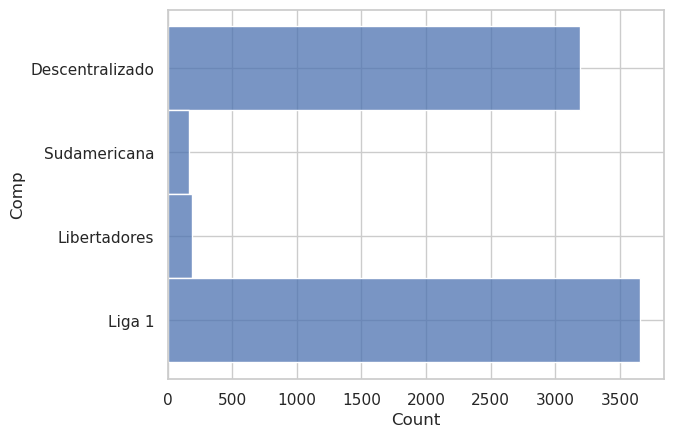

In [10]:
ax = sns.histplot(df, y='Comp');

Solo nos concentraremos en la liga local peruana. Por lo tanto, se ignorará los torneos como 'Sudamericana' y 'Libertadores'.

## Columna 'Round'

In [11]:
df['Round'].unique()

array(['Torneo Apertura', 'Torneo Clausura', 'Championship play-off',
       'First stage', 'Second stage', 'Round of 16', 'Quarter-finals',
       'Clausura play-off', 'Relegation play-off', 'Liguillas',
       'Semi-finals', 'Finals', 'Third-place play-off',
       'Torneo de Verano Regular Season', 'Group stage',
       'Torneo de Verano Finals', 'Second qualifying stage',
       'First qualifying stage', 'Third qualifying stage', 'Group Stage',
       'Final', 'Knockout round play-offs'], dtype=object)

In [12]:
df_local_comp = df[(df['Comp'] == 'Liga 1') | (df['Comp'] == 'Descentralizado')]

In [13]:
df_local_comp[df_local_comp['Round'] == 'Championship play-off']

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team
30,2014-12-13,NaN,Descentralizado,Championship play-off,Sat,Home,D,2,2,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Juan Aurich
31,2014-12-16,NaN,Descentralizado,Championship play-off,Tue,Away,D,0,0,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Juan Aurich
32,2014-12-20,NaN,Descentralizado,Championship play-off,Sat,Neutral,L,2,3,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Juan Aurich
423,2014-12-13,NaN,Descentralizado,Championship play-off,Sat,Away,D,2,2,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal
424,2014-12-16,NaN,Descentralizado,Championship play-off,Tue,Home,D,0,0,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal
425,2014-12-20,NaN,Descentralizado,Championship play-off,Sat,Neutral,W,3,2,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Sporting Cristal


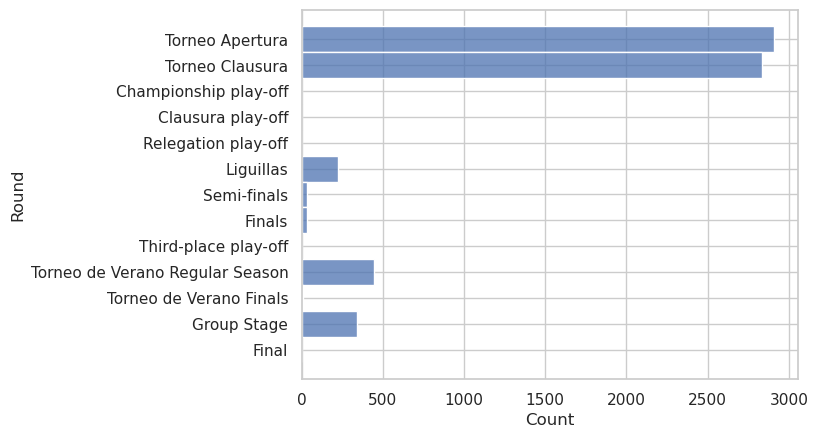

In [14]:
sns.histplot(df_local_comp, y='Round');

Debido a la gran cantidad de tipo de competencias, lo ideal sería agruparlas en un grupo más pequeño que represente la etapa en la que se encuentran:
- Regular Season: Torneo Apertura, Torneo Clausura, Liguillas, Torneo de Verano Regular Season, Group Stage
- Finals: Championship play-off, Clausura play-off, Relegation play-off, Semi-finals, Finals, Third-place play-off, Torneo de Verano Finals, Final

## Columna 'Day'

La columna debe ser reemplazada por la conversión a `datetimens` de las columnas `Date` y `Time`.

## Columna 'Venue'

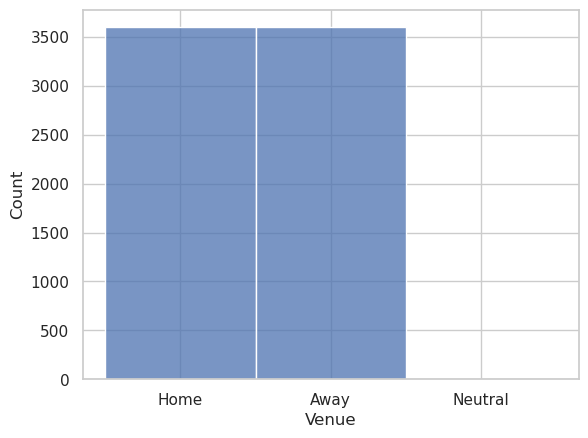

In [15]:
sns.histplot(df, x='Venue');

In [16]:
df[df['Venue'] == 'Neutral']

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team
32,2014-12-20,NaN,Descentralizado,Championship play-off,Sat,Neutral,L,2,3,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Juan Aurich
357,2014-12-03,NaN,Descentralizado,Clausura play-off,Wed,Neutral,L,0,1,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Alianza Lima
422,2014-12-03,NaN,Descentralizado,Clausura play-off,Wed,Neutral,W,1,0,Alianza Lima,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal
425,2014-12-20,NaN,Descentralizado,Championship play-off,Sat,Neutral,W,3,2,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Sporting Cristal
456,2014-12-04,15:00,Descentralizado,Relegation play-off,Thu,Neutral,W,1,0,Los Caimanes,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Sport Huancayo
517,2014-12-04,15:00,Descentralizado,Relegation play-off,Thu,Neutral,L,0,1,Sport Huancayo,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Required Extra Time,Los Caimanes


Debido a que lo que queremos realizar con este dataset es un clasificador que determine si el equipo Local ganará el partido o no, no nos sirve los partidos en locaciones Neutrales, por lo tanto, los __eliminaremos__.

## Columna 'Result' 

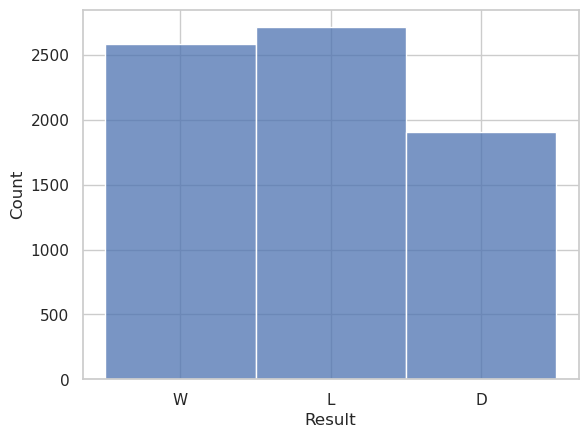

In [17]:
sns.histplot(df, x='Result');

En una etapa del proceso más avanzado, la columna deberá cambiar de valores para que sea un target binario.
- Result = 1: Equipo local gana
- Result = 0: Equipo local no gana

## Columna 'GF', 'GA'

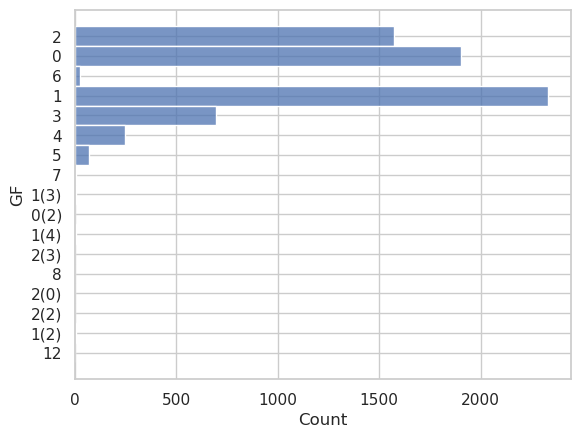

In [18]:
sns.histplot(df_local_comp, y='GF');

In [19]:
df[df['GF'] == '0(2)']

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team
722,2016-12-04,16:00,Descentralizado,Semi-finals,Sun,Away,L,0(2),1(3),Sporting Cristal,NaN,"19,604",NaN,NaN,NaN,Miguel Santiváñez,Match Report,Leg 2 of 2; Sporting Cristal won; Sporting Cri...,Deportivo Municipal


Después de analizar la fuente, los valores dentro de los paréntesis son goles realizados en la etapa de penales del partido.
Como no nos interesa el resultado de esa etapa, sino del partido de 90 minutos, ignoraremos los goles de penales.

## Columna 'Team' y 'Opponent'

In [20]:
opp = set(df_local_comp['Opponent'].unique().tolist())
tm = set(df_local_comp['Team'].unique().tolist())

In [21]:
tm - opp

{'Alianza Atletico',
 'Alianza Universidad',
 'Atletico Grau',
 'Carlos A Mannucci',
 'Defensor La Bocana',
 'Deportivo Municipal',
 'Leon de Huanuco',
 'San Simon',
 'Union Comercio',
 'Universidad Cesar Vallejo',
 'Universidad San Martin',
 'Universidad Tecnica de Cajamarca'}

In [22]:
opp - tm

{'Alianza Atlético',
 'Alianza Univ',
 'Atlético Grau',
 'Comerciantes',
 'Dep Municipal',
 'La Bocana',
 'León Huánuco',
 'Mannucci',
 'San Simón',
 'U César Vallejo',
 'USMP',
 'UTC',
 'Unión Comercio'}

In [23]:
len(opp), len(tm)

(36, 35)

In [24]:
opp

{'ADT Tarma',
 'Alianza Atlético',
 'Alianza Lima',
 'Alianza Univ',
 'Atlético Grau',
 'Ayacucho',
 'Binacional',
 'CDC Santa Rosa',
 'Cantolao',
 'Carlos Stein',
 'Cienciano',
 'Comerciantes',
 'Comerciantes Unidos',
 'Cusco',
 'Dep Municipal',
 'Deportivo Garcilaso',
 'Juan Aurich',
 'La Bocana',
 'León Huánuco',
 'Llacuabamba',
 'Los Caimanes',
 'Mannucci',
 'Melgar',
 'Pirata',
 'Real Garcilaso',
 'San Simón',
 'Sport Boys',
 'Sport Huancayo',
 'Sport Loreto',
 'Sport Rosario',
 'Sporting Cristal',
 'U César Vallejo',
 'USMP',
 'UTC',
 'Universitario',
 'Unión Comercio'}

Después de analizar los nombres, se concluye que se deben estandarizar los nombres para evitar problemas.

Además, dentro de la columna `Opponent` existe una duplicidad con el equipo _Comerciantes Unidos_, por lo que se debe también corregir ese caso.

## Columna 'Poss'

In [25]:
df_local_comp['Poss'].isnull().sum() / df_local_comp.shape[0]

np.float64(1.0)

Para el torneo local, esta columna tiene valores nulos. Por lo tanto, debe __eliminarse__.

## Columna 'Attendance'

In [26]:
df_local_comp['Attendance'].isnull().sum() / df_local_comp.shape[0]

np.float64(0.5261313868613139)

Para el torneo local, la columna tiene alrededor del 50% de nulos en los registros. Por lo tanto, debe __eliminarse__.

## Columna 'Captain'

In [27]:
df_local_comp['Captain'].isnull().sum() / df_local_comp.shape[0]

np.float64(0.23036496350364963)

In [28]:
df_local_comp['Captain'].unique().shape

(331,)

Para el torneo local, la columna tiene alrededor del 20% de nulos, por lo que no merece ser eliminada.
Sin embargo, los valores son nombres de jugadores, lo cual es un valor que a principio no es muy útil para la predicción.
Además, existen 331 valores únicos, lo que lo convierte en una columna difícil de trabajar.

## Columna 'Formation'

In [29]:
df_local_comp['Formation'].isnull().sum() / df_local_comp.shape[0]

np.float64(0.26496350364963506)

In [30]:
fm = df_local_comp['Formation'].unique()
fm

array([nan, '4-1-4-1', '3-5-2', '4-5-1', '4-3-3', '4-2-3-1', '3-4-1-2',
       '3-4-3', '4-1-3-2', '4-4-2', '4-4-1-1', '4-3-1-2', '5-4-1',
       '5-3-2', '4-2-2-2', '4-3-2-1', '3-2-4-1', '4-4-2◆', '3-1-4-2',
       '3-5-1-1', '3-3-3-1', '4-2-4'], dtype=object)

In [31]:
fm.shape

(22,)

La columna tiene cerca del 26% de valores como nulos, sin embargo, tiene 22 valores únicos, lo que lo hace complicado de trabajar.
Además, es una columna que en un primer momento no aporta demasiado valor a la predicción en base al conocimiento del dominio.

Por lo tanto, se __eliminará__.

## Columna 'Opp Formation'

In [32]:
df_local_comp['Opp Formation'].isnull().sum() / df_local_comp.shape[0]

np.float64(0.26496350364963506)

In [33]:
ofm = df_local_comp['Opp Formation'].unique()
ofm

array([nan, '4-3-1-2', '4-2-3-1', '5-3-2', '4-2-2-2', '4-3-3', '4-5-1',
       '4-1-4-1', '4-4-2', '4-4-1-1', '3-4-3', '3-4-1-2', '3-5-2',
       '5-4-1', '4-3-2-1', '3-2-4-1', '4-1-3-2', '3-1-4-2', '3-5-1-1',
       '3-3-3-1', '4-2-4'], dtype=object)

In [34]:
ofm.shape

(21,)

La columna tiene cerca del 26% de valores como nulos, sin embargo, tiene 22 valores únicos, lo que lo hace complicado de trabajar.
Además, es una columna que en un primer momento no aporta demasiado valor a la predicción en base al conocimiento del dominio.

Por lo tanto, se __eliminará__.

## Columna 'Referee'

Esta columna contiene los nombres de los árbitros de los partidos, lo que no ofrece demasiado valor para la predicción. Por lo tanto, se __eliminará__.

## Columna 'Match Report'

In [35]:
df_local_comp['Match Report'].unique()

array(['Match Report'], dtype=object)

Esta columna no aporta valor para la predicción. Se __eliminará__.

## Columna 'Notes'

In [36]:
df_local_comp['Notes'].info()

<class 'pandas.core.series.Series'>
Index: 6850 entries, 0 to 7205
Series name: Notes
Non-Null Count  Dtype 
--------------  ----- 
122 non-null    object
dtypes: object(1)
memory usage: 107.0+ KB


In [37]:
df_local_comp['Notes'].isnull().sum() / df_local_comp.shape[0]

np.float64(0.9821897810218978)

La columna será __eliminada__, pues no aporta valor a la predicción, además de que tiene cerca del 98% de valores nulos.

# Limpiando la data

## Manejando las fechas de los partidos

In [38]:
df_time_null = df[(df['Time'].isnull()) & (df['Venue'] != 'Neutral')]
df_time_null

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team
30,2014-12-13,NaN,Descentralizado,Championship play-off,Sat,Home,D,2,2,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Juan Aurich
31,2014-12-16,NaN,Descentralizado,Championship play-off,Tue,Away,D,0,0,Sporting Cristal,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Juan Aurich
423,2014-12-13,NaN,Descentralizado,Championship play-off,Sat,Away,D,2,2,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal
424,2014-12-16,NaN,Descentralizado,Championship play-off,Tue,Home,D,0,0,Juan Aurich,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,NaN,Sporting Cristal


In [39]:
df_time_null.iloc[[0, 2], 1] = '15:45'
df_time_null.iloc[[1, 3], 1] = '20:00'
df.loc[df_time_null.index] = df_time_null

In [40]:
datetime = df['Date'] + ' ' + df['Time']
df['DateTime'] = pd.to_datetime(datetime, format='%Y-%m-%d %H:%M')

In [41]:
df['Day'] = df['DateTime'].dt.dayofweek

In [42]:
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.head()

,Comp,Round,Day,Venue,Result,GF,GA,Opponent,Poss,Attendance,Captain,Formation,Opp Formation,Referee,Match Report,Notes,Team,DateTime
0,Descentralizado,Torneo Apertura,5.0,Home,W,2,1,San Simón,NaN,"1,877",NaN,NaN,NaN,Fernando Legario,Match Report,NaN,Juan Aurich,2014-06-07 18:00:00
1,Descentralizado,Torneo Apertura,5.0,Away,L,0,2,U César Vallejo,NaN,"1,375",NaN,NaN,NaN,Luis Garay Evia,Match Report,NaN,Juan Aurich,2014-06-14 16:00:00
2,Descentralizado,Torneo Apertura,5.0,Home,W,2,1,León Huánuco,NaN,"1,683",NaN,NaN,NaN,Diego Haro,Match Report,NaN,Juan Aurich,2014-06-21 15:45:00
3,Descentralizado,Torneo Apertura,6.0,Away,D,0,0,Alianza Lima,NaN,"6,119",NaN,NaN,NaN,Luis Garay Evia,Match Report,NaN,Juan Aurich,2014-06-29 16:00:00
4,Descentralizado,Torneo Apertura,5.0,Home,W,6,0,Sport Huancayo,NaN,"1,366",NaN,NaN,NaN,Miguel Santiváñez,Match Report,NaN,Juan Aurich,2014-07-05 17:30:00


## Ajustando la compentencia

In [43]:
df['Comp'] = df['Comp'].replace({'Descentralizado': 'Liga 1'})
df = df[df['Comp'] == 'Liga 1']
df['Comp'].unique()

array(['Liga 1'], dtype=object)

In [44]:
df.shape

(6850, 18)

## Ajustando la columna Round

In [45]:
regular_season = ['Torneo Apertura', 'Torneo Clausura', 'Liguillas', 'Torneo de Verano Regular Season', 'Group Stage']
df['Round'] = df['Round'].replace(to_replace=regular_season, value='Regular Season')

In [46]:
finals = ['Championship play-off', 'Clausura play-off', 'Relegation play-off', 'Semi-finals', 'Finals', 'Third-place play-off', 'Torneo de Verano Finals', 'Final']
df['Round'] = df['Round'].replace(to_replace=finals, value='Finals')

In [47]:
df['Round'].unique()

array(['Regular Season', 'Finals'], dtype=object)

## Eliminamos partidos neutrales

In [48]:
df = df.drop(df[df['Venue'] == 'Neutral'].index).reset_index(drop=True)
df['Venue'].unique()

array(['Home', 'Away'], dtype=object)

In [49]:
df.shape

(6844, 18)

## Ajustamos los goles

In [50]:
# Se tratará como empate y se ignorará los goles de penales
def get_goals(row):
    row['GF'] = row['GF'].split('(')[0].strip()
    row['GA'] = row['GA'].split('(')[0].strip()
    return row
df = df.apply(get_goals, axis=1)
df['GF'] = df['GF'].astype(int)
df['GA'] = df['GA'].astype(int)

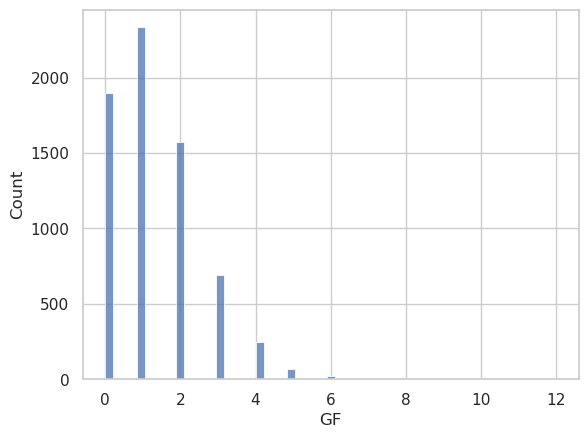

In [51]:
sns.histplot(df, x='GF');

In [52]:
df['GF'].describe()

count    6844.000000
mean        1.327148
std         1.196377
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: GF, dtype: float64

## Resolviendo inconsistencias en los nombres

In [53]:
team_dict = {
    'Alianza Atletico': 'Alianza Atlético',
    'Alianza Univ': 'Alianza Universidad',
    'Atletico Grau': 'Atlético Grau',
    'Mannucci': 'Carlos A Mannucci',
    'La Bocana': 'Defensor La Bocana',
    'Dep Municipal': 'Deportivo Municipal',
    'Leon de Huanuco': 'León Huánuco',
    'San Simon': 'San Simón',
    'U César Vallejo': 'Universidad César Vallejo',
    'Universidad Cesar Vallejo': 'Universidad César Vallejo',
    'Union Comercio':'Unión Comercio',
    'USMP': 'Universidad San Martin',
    'UTC':'Universidad Técnica de Cajamarca',
    'Universidad Tecnica de Cajamarca': 'Universidad Técnica de Cajamarca',
    'Comerciantes': 'Comerciantes Unidos',
}

In [54]:
df['Team'] = df['Team'].replace(team_dict)
df['Opponent'] = df['Opponent'].replace(team_dict)

In [55]:
opp = set(df['Opponent'].unique().tolist())
tm = set(df['Team'].unique().tolist())

In [56]:
tm - opp, opp - tm, len(tm), len(opp)

(set(), set(), 35, 35)

## Analizamos partidos duplicados
Debido a la naturaleza del dataset, el cual contiene todos los partidos por equipo, se tienen partidos duplicados.
Ejemplo:

- Universitario vs Alianza Lima: De este partido se tiene el registro de Univeristario en una fila y el de Alianza en otra.

Por lo tanto, debemos reducir el dataset para que exista un registro por partido con el equipo local y equipo visitante.

In [57]:
inv = {'M': 'M', 'W': 'L', 'L': 'W', 'D': 'D'}

In [58]:
def parse_matches(row) -> pd.Series:
    if row['Venue'] == 'Home':
        row['Home Team'] = row['Team']
        row['Away Team'] = row['Opponent']
    else:
        row['Home Team'] = row['Opponent']
        row['Away Team'] = row['Team']
        # Swap goals for away matches
        row['GF'], row['GA'] = row['GA'], row['GF']
        # Invert result for away matches
        row['Result'] = inv[row['Result']]

    return row

df = (df.apply(parse_matches, axis=1)  # type: ignore
      # Remove duplicate matches
      .drop_duplicates(subset=['DateTime', 'Home Team', 'Away Team'],
                       ignore_index=True)
      # Sort matches by date and time
      .sort_values(['DateTime'], axis=0, ignore_index=True)
     )

In [59]:
df.shape

(3422, 20)

## Dropeamos las columnas que no aportan valor

In [60]:
cols = ['Comp', 'Opponent', 'Team', 'Poss', 'Attendance', 'Captain', 'Formation', 'Opp Formation', 'Referee', 'Match Report', 'Notes']
df = df.drop(cols, axis=1)
df.shape

(3422, 9)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422 entries, 0 to 3421
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Round      3422 non-null   object        
 1   Day        3422 non-null   float64       
 2   Venue      3422 non-null   object        
 3   Result     3422 non-null   object        
 4   GF         3422 non-null   int64         
 5   GA         3422 non-null   int64         
 6   DateTime   3422 non-null   datetime64[ns]
 7   Home Team  3422 non-null   object        
 8   Away Team  3422 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 240.7+ KB


# Feature Engineering

## En qué jornada se jugó cada partido?

In [114]:
def get_match_week(df: pd.DataFrame) -> pd.DataFrame:
    df['year'] = df['DateTime'].dt.year

    cols = ['year', 'Home Team']
    df_home = df[cols].rename(columns={'Home Team': 'Team'})
    df_home['venue'] = 'Home'

    cols = ['year', 'Away Team']
    df_away = df[cols].rename(columns={'Away Team': 'Team'})
    df_away['venue'] = 'Away'

    df_largo = pd.concat([df_home, df_away])
    df_largo = df_largo.sort_index()

    df_largo['MW'] = (df_largo.groupby(['year', 'Team']).cumcount() + 1)
    df_pivot = df_largo.pivot(
        columns='venue', values='MW')

    df_pivot['MW'] = df_pivot[[
        'Away', 'Home']].max(axis=1)

    return (pd.concat([df, df_pivot['MW']], axis=1)
               .drop('year', axis=1))


In [63]:
df = get_match_week(df)

## Con cuántos goles marcados y concedidos llega cada equipo?

In [64]:
def goals_scored(df: pd.DataFrame) -> pd.DataFrame:
    # Columna útil para la agrupación por temporadas
    df['year'] = df['DateTime'].dt.year

    # DataFrame con los goles de los equipos locales
    # en sus respectivos años
    cols = ['year', 'Home Team', 'GF', 'GA']
    df_home = df[cols].rename(columns={'Home Team': 'Team',
                                       'GF': 'Goals_scored',
                                       'GA': 'Goals_Conceded'})
    df_home['Venue'] = 'Home'

    # DataFrame con los goles de los equipo visitantes
    # en sus respectivos años
    cols = ['year', 'Away Team', 'GA', 'GF']
    df_away = df[cols].rename(columns={'Away Team': 'Team',
                                       'GA': 'Goals_scored',
                                       'GF': 'Goals_Conceded'})
    df_away['Venue'] = 'Away'

    # Concatenamos para tenerlos todos en un solo DataFrame largo
    df_large = pd.concat([df_home, df_away])

    # Ordenamos por índice para que los partidos estén ordenados
    df_large = df_large.sort_index()

    # Creamos el dataframe de goles acumulados
    df_large['GS'] = (df_large
                      # Agrupamos mediante el año y el equipo y
                      # obtenemos la columna 'Goals Scored'
                      .groupby(['year', 'Team'])['Goals_scored']
                      # Shifteamos en 1 periodo para que la suma
                      # acumulativa comience en 0
                      .shift(fill_value=0)
                      # Volvemos a agrupar debido a que pandas
                      # olvida que había agrupado despues de shiftear
                      .groupby([df_large['year'], df_large['Team']])
                      # Realizamos la suma acumulativa por
                      # grupo (año y equipo)
                      .cumsum())

    df_large['GC'] = (df_large
                      .groupby(['year', 'Team'])['Goals_Conceded']
                      .shift(fill_value=0)
                      .groupby([df_large['year'], df_large['Team']])
                      .cumsum())

    # Pivoteamos para que los valores de la columna Venue (Away y Home),
    # sean las columnas y que la data de cada fila sean los
    # goles acumulados (GS). El orden será en base al índice (partido)
    df_pivot_gs = df_large.pivot(
        columns='Venue', values='GS')
    df_pivot_gc = df_large.pivot(
        columns='Venue', values='GC')

    df_pivot_gs.columns = ['ATGS', 'HTGS']
    df_pivot_gc.columns = ['ATGC', 'HTGC']
    df_pivot_gs = df_pivot_gs[['HTGS', 'ATGS']]
    df_pivot_gc = df_pivot_gc[['HTGC', 'ATGC']]

    # Concatemamos (ordenando las columnas) y retornamos el nuevo DataFrame
    return (pd.concat([df, df_pivot_gs, df_pivot_gc], axis=1)
               .drop('year', axis=1)
           )

In [65]:
df = goals_scored(df)

## Con cuánto gol de diferencia llega cada equipo a los partidos?

In [66]:
df['HTGD'] = df['HTGS'] - df['HTGC']
df['ATGD'] = df['ATGS'] - df['ATGC']

## Cuál es el rendimiento en goles del equipo antes de cada partido?

In [67]:
df['HTGSForm'] = df['HTGS'] / (df['MW'] - 1)
df['ATGSForm'] = df['ATGS'] / (df['MW'] - 1)

df['HTGSForm'] = df['HTGSForm'].fillna(0)
df['ATGSForm'] = df['ATGSForm'].fillna(0)

df['HTGCForm'] = df['HTGC'] / (df['MW'] - 1)
df['ATGCForm'] = df['ATGC'] / (df['MW'] - 1)

df['HTGCForm'] = df['HTGCForm'].fillna(0)
df['ATGCForm'] = df['ATGCForm'].fillna(0)

## Con cuántos puntos llegan los equipos locales y visitante a cada partido?

In [68]:
def which_points(row):
    """Función que permite calcular los puntos dependiendo de la localidad del equipo y el resultado del partido
    
       Parámetro 
       --------
       row: Fila con los datos para realizar el cálculo

       Retorna
       -------
       punto: 3 - Equipo gana, 1 - Equipo empata, 0 - Equipo pierde
    """
    result = row['Result']
    venue = row['venue']

    if result == 'D':
        return 1
    if venue == 'Home':
        if result == 'W':
            return 3
    else:
        if result == 'L':
            return 3
    
    return 0

In [69]:
def get_points(df: pd.DataFrame) -> pd.DataFrame:
    """Función que calcula los puntos con los que el equipo local y visitante
    llegan a cada partido.

    Parámetro
    ---------
    df: DataFrame con los datos para calcular los puntos

    Retorna
    -------
    df: DataFrame con las columnas HTP (Home Team Points) y ATP (Away Team Points)
    """
    df['year'] = df['DateTime'].dt.year

    df_home = df[['year', 'Home Team', 'Result']].rename(columns={'Home Team': 'Team'})
    df_home['venue'] = 'Home'

    df_away = df[['year', 'Away Team', 'Result']].rename(columns={'Away Team': 'Team'})
    df_away['venue'] = 'Away'

    df_large = pd.concat([df_home, df_away])
    df_large = df_large.sort_index()

    # Calculamos el punto de cada equipo que obtiene del partido
    df_large['Points'] = df_large.apply(which_points, axis=1)

    # Calculamos el acumulado con un periodo de retraso para que comiencen
    # todas las temporadas con 0
    df_large['AccPoints'] = (df_large
                             .groupby(['year', 'Team'])['Points']
                             .shift(fill_value=0)
                             .groupby([df_large['year'], df_large['Team']])
                             .cumsum()
                            )
    df_pivot = df_large.pivot(columns='venue', values='AccPoints')
    df_pivot.columns = ['ATP', 'HTP']
    return (pd.concat([df, df_pivot[['HTP', 'ATP']]], axis=1)
           .drop('year', axis=1))

In [70]:
df = get_points(df)

## Cuál es la diferencia de puntos entre ambos equipos antes del partido

In [71]:
df['PD'] = df['HTP'] - df['ATP']

df['HTPForm'] = df['HTP'] / (df['MW'] - 1)
df['ATPForm'] = df['ATP'] / (df['MW'] - 1)

df['HTPForm'] = df['HTPForm'].fillna(0)
df['ATPForm'] = df['ATPForm'].fillna(0)

df['PDForm'] = df['HTPForm'] - df['ATPForm']

In [72]:
team = 'Alianza Lima'
df[(df['DateTime'].dt.year == 2023) & ((df['Home Team'] == team) | (df['Away Team'] == team))].head()

,Round,Day,Venue,Result,GF,GA,DateTime,Home Team,Away Team,MW,...,HTGSForm,ATGSForm,HTGCForm,ATGCForm,HTP,ATP,PD,HTPForm,ATPForm,PDForm
2777,Regular Season,6.0,Away,W,3,0,2023-02-05 10:00:00,Sporting Cristal,Alianza Lima,1,...,0.0,0.0,0.00,0.0,0,0,0,0.0,0.0,0.0
2788,Regular Season,6.0,Home,W,2,0,2023-02-12 16:00:00,Alianza Lima,Sport Boys,2,...,0.0,2.0,3.00,1.0,0,3,-3,0.0,3.0,-3.0
2795,Regular Season,6.0,Away,L,1,2,2023-02-19 15:30:00,Universitario,Alianza Lima,3,...,2.0,1.0,0.50,1.5,3,3,0,1.5,1.5,0.0
2809,Regular Season,6.0,Away,L,0,1,2023-03-05 15:30:00,Universidad Técnica de Cajamarca,Alianza Lima,5,...,1.0,1.0,0.75,1.0,6,6,0,1.5,1.5,0.0
2814,Regular Season,5.0,Home,W,2,0,2023-03-11 20:00:00,Alianza Lima,Cusco,6,...,1.0,1.4,0.80,1.8,9,9,0,1.8,1.8,0.0


## Con cuántos partidos sin perder llegan los equipos locales y visitantes a cada partido?

In [73]:
def calculate_unbeaten_streaks(results):
    u_streak = 0
    unbeaten_list = []
    
    for res in results:
        unbeaten_list.append(u_streak)
        
        if res != 'L':
            u_streak += 1
        else:
            u_streak = 0
        
    return unbeaten_list

In [74]:
def calculate_losing_streaks(results):
    l_streak = 0
    losing_list = []
    
    for res in results:
        losing_list.append(l_streak)
        
        if res != 'L':
            l_streak = 0
        else:
            l_streak += 1
        
    return losing_list

In [75]:
def get_streaks(df: pd.DataFrame) -> pd.DataFrame:
    df_home = df[['Home Team', 'Result']].rename(columns={'Home Team': 'Team'})
    df_home['venue'] = 'home'

    df_away = df[['Away Team', 'Result']].rename(columns={'Away Team': 'Team'})
    df_away['venue'] = 'away'

    df_large = pd.concat([df_home, df_away])
    df_large = df_large.sort_index()

    inv = {'W': 'L', 'D': 'D', 'L': 'W'}

    df_large['Result Team'] = df_large.apply(lambda r: r['Result'] if r['venue'] == 'home' else inv[r['Result']], axis=1)
    
    df_large['US'] = (df_large
                           .groupby('Team')['Result Team']
                           .transform(lambda serie: calculate_unbeaten_streaks(serie))
                          )
    df_large['LS'] = (df_large
                           .groupby('Team')['Result Team']
                           .transform(lambda serie: calculate_losing_streaks(serie))
                          )

    df_pivot_us = df_large.pivot(columns='venue', values='US')
    df_pivot_us.columns = ['ATUS', 'HTUS']
    
    df_pivot_ls = df_large.pivot(columns='venue', values='LS')
    df_pivot_ls.columns = ['ATLS', 'HTLS']

    return (pd.concat([df, df_pivot_us[['HTUS', 'ATUS']], df_pivot_ls[['HTLS', 'ATLS']]], axis=1))

In [76]:
df = get_streaks(df)

In [77]:
team = 'Universitario'
df[(df['DateTime'].dt.year == 2023) & ((df['Home Team'] == team) | (df['Away Team'] == team))].head()

,Round,Day,Venue,Result,GF,GA,DateTime,Home Team,Away Team,MW,...,HTP,ATP,PD,HTPForm,ATPForm,PDForm,HTUS,ATUS,HTLS,ATLS
2775,Regular Season,5.0,Away,W,4,0,2023-02-04 15:30:00,Universitario,Cantolao,1,...,0,0,0,0.000000,0.0,0.000000,12,1,0,0
2786,Regular Season,6.0,Home,W,1,0,2023-02-12 13:30:00,Unión Comercio,Universitario,2,...,0,3,-3,0.000000,3.0,-3.000000,0,13,6,0
2795,Regular Season,6.0,Away,L,1,2,2023-02-19 15:30:00,Universitario,Alianza Lima,3,...,3,3,0,1.500000,1.5,0.000000,0,1,1,0
2803,Regular Season,6.0,Home,W,2,0,2023-02-26 19:00:00,Carlos A Mannucci,Universitario,4,...,7,3,4,2.333333,1.0,1.333333,3,0,0,2
2810,Regular Season,6.0,Away,W,1,0,2023-03-05 15:30:00,Universitario,Melgar,5,...,3,0,3,0.750000,0.0,0.750000,0,0,3,4


## Cuáles son los resultados de los últimos 5 partidos de los equipos locales y visitantes antes de cada partido?

In [78]:
def get_5_last_games(df: pd.DataFrame):
    """Función que obtiene el resultado de los últimos 5 partidos de los equipos antes de cada partido

    Parámetro
    =========
    df: DataFrame con la data para el análisis

    Retorna
    =======
    df: DataFrame con las columnas LM_1, LM_2, ..., LM_5 que representan
        a los resultados de los últimos 5 partidos jugados.
    """
    df['year'] = df['DateTime'].dt.year

    df_home = df[['year', 'Home Team', 'Result']].rename(columns={'Home Team': 'Team'})
    df_home['Venue'] = 'home'

    df_away = df[['year', 'Away Team', 'Result']].rename(columns={'Away Team': 'Team'})
    df_away['Venue'] = 'away'

    df_large = pd.concat([df_home, df_away])
    df_large = df_large.sort_index()

    # Resultado invertido para el equipo visitante
    inv = {'W': 'L', 'D': 'D', 'L': 'W', 'M': 'M'}

    for i in range(1, 6):
        colname = 'LM_' + str(i)
        df_large[colname] = (df_large.groupby(['year', 'Team'])
                             # Corremos la data i periodos para tener los resultados de los i últimos partidos antes de cada partido
                            .shift(i, fill_value='M')
                             # En caso el equipo en cuestión sea visitante, se invierte el resultado
                            .apply(lambda row: row['Result'] if row['Venue'] == 'home' else inv[row['Result']], axis=1))

        df_pivot = df_large.pivot(columns='Venue', values=colname)
        df_pivot.columns = ['A' + colname, 'H' + colname]

        df = pd.concat([df, df_pivot[['H' + colname, 'A' + colname]]], axis=1)
    
    return df.drop('year', axis=1)

In [79]:
df = get_5_last_games(df)

In [80]:
team = 'Universitario'
df[(df['DateTime'].dt.year == 2023) & ((df['Home Team'] == team) | (df['Away Team'] == team))].head()

,Round,Day,Venue,Result,GF,GA,DateTime,Home Team,Away Team,MW,...,HLM_1,ALM_1,HLM_2,ALM_2,HLM_3,ALM_3,HLM_4,ALM_4,HLM_5,ALM_5
2775,Regular Season,5.0,Away,W,4,0,2023-02-04 15:30:00,Universitario,Cantolao,1,...,M,M,M,M,M,M,M,M,M,M
2786,Regular Season,6.0,Home,W,1,0,2023-02-12 13:30:00,Unión Comercio,Universitario,2,...,L,W,M,M,M,M,M,M,M,M
2795,Regular Season,6.0,Away,L,1,2,2023-02-19 15:30:00,Universitario,Alianza Lima,3,...,L,W,W,L,M,M,M,M,M,M
2803,Regular Season,6.0,Home,W,2,0,2023-02-26 19:00:00,Carlos A Mannucci,Universitario,4,...,W,L,D,L,W,W,M,M,M,M
2810,Regular Season,6.0,Away,W,1,0,2023-03-05 15:30:00,Universitario,Melgar,5,...,L,L,L,L,L,L,W,M,M,M


## El equipo local ganó su partido?

In [81]:
df['Result'] = df['Result'].apply(
    lambda res: 1 if res == 'W' else 0)

# Clasificación

## Librerías para Clasificación

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from xgboost import XGBClassifier

from functools import partial

## Clasificación Base

In [83]:
num_cols = ['Day','MW','HTGS','ATGS','HTGC',
            'ATGC','HTGD','ATGD','HTGSForm',
            'ATGSForm','HTGCForm','ATGCForm',
            'HTP','ATP','PD','HTPForm','ATPForm',
            'PDForm','HTUS','ATUS','HTLS','ATLS']

In [84]:
cat_cols = ['Round', 'HLM_1', 'HLM_2', 'HLM_3', 'HLM_4', 'HLM_5',
             'ALM_1', 'ALM_2', 'ALM_3', 'ALM_4', 'ALM_5']

In [85]:
X = df.copy()
y = X.pop('Result')

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state=69)

In [87]:
preproc = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OrdinalEncoder(), cat_cols),
], remainder='drop')

In [88]:
pipe = Pipeline([
    ('preproc', preproc),
    ('clf', LogisticRegression()),
])

In [89]:
param_grid = [
    {
        # Parámetros para la regressión
        'clf': [LogisticRegression(max_iter=1000)],
        'clf__random_state': [69],
        'clf__solver': ['liblinear'],
        # Regularizadores
        'clf__penalty': ['l1', 'l2'],
        # Control de Regularizaciones inversas
        'clf__C': [0.01, 0.1, 1, 10, 100],
    },
    {
        # Parémetros para Support Vector Machine
        'clf': [SVC()],
        # rbf suele funcionar mejor en casos no lineales
        'clf__kernel': ['linear', 'rbf'],
        'clf__C': [0.1, 1, 10],
        'clf__gamma': ['scale', 'auto'],
    },
    {
        # Parámetros para Decision Trees
        'clf': [DecisionTreeClassifier()],
        'clf__random_state': [69],
        'clf__criterion': ['gini', 'entropy'],
        # Controla la complejidad del árbol
        'clf__max_depth': [3, 5, 10, None],
        # Evita que división de ramas con pocos ejemplos
        'clf__min_samples_split': [2, 5, 10],
    },
    {
        # Parámetros para Random Forest
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [50, 100, 200], 
        # Al controlar la complejidad evita el overfitting
        'clf__max_depth': [5, 10, None],
        # Controlan los features que se prueban en cada split
        'clf__max_features': ['sqrt', 'log2'],
        'clf__random_state': [69],
    },
    {
        # XGBoost parameters
        'clf': [XGBClassifier(eval_metric='logloss')],
        'clf__learning_rate': [0.01, 0.1],  # Testing different learning rates
        # Se debe ajustar junto al learning rate
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [3, 6, 9],
        # Reguladores que ayudan a evitar el overfitting
        'clf__subsample': [0.8, 1],
        'clf__colsample_bytree': [0.8, 1],
        # Binary classification objective
        'clf__objective': ['binary:logistic'],
        'clf__random_state': [69],
    }
]

In [90]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Day',
                                                                          'MW',
                                                                          'HTGS',
                                                                          'ATGS',
                                                                          'HTGC',
                                                                          'ATGC',
                                                                          'HTGD',
                                                                          'ATGD',
                                                                          'HTGSForm',
                                                                          'ATGSForm',
                                                                          'HTGCForm',
                                                                          'ATGCForm',
                                                                          'HTP',
                                                                          'ATP',
                                                                          'PD',
                                                                          'HTPForm',
                                                                          'ATPForm',
                                                                          'PDForm',
                                                                          'HTUS',
                                                                          'ATUS',
                                                                          'HTLS',
                                                                          'ATLS']),
                                                                        ('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Round',
                                                                          'HLM_1',
                                                                          'HLM_2',
                                                                          'HLM_3',
                                                                          'HLM_4',...
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...)],
                          'clf__colsample_bytree': [0.8, 1],
                          'clf__learning_rate': [0.01, 0.1],
                          'clf__max_depth': [3, 6, 9],
                          'clf__n_estimators': [100, 200],
                          'clf__objective': ['binary:logistic'],
                          'clf__random_state': [69],
                          'clf__subsample': [0.8, 1]}])

In [91]:
y_pred = grid.best_estimator_.predict(X_test)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.59      0.57       333
           1       0.58      0.53      0.55       352

    accuracy                           0.56       685
   macro avg       0.56      0.56      0.56       685
weighted avg       0.56      0.56      0.56       685



## Clasificación Final

### Revisión gráfica de features

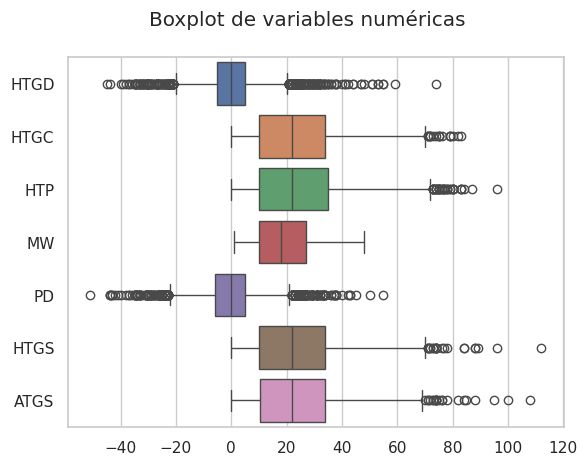

In [115]:
sns.boxplot(data=df[num_cols], orient='h');
plt.suptitle('Boxplot de variables numéricas');

Las variables Form, tienen presentan casi nula dispersión en sus valores. 

Mientras que las variables HTGS, ATGS, HTGC, ATGC, etc; presentan mayor dispersión y outliers por lo que pueden ser más útiles.

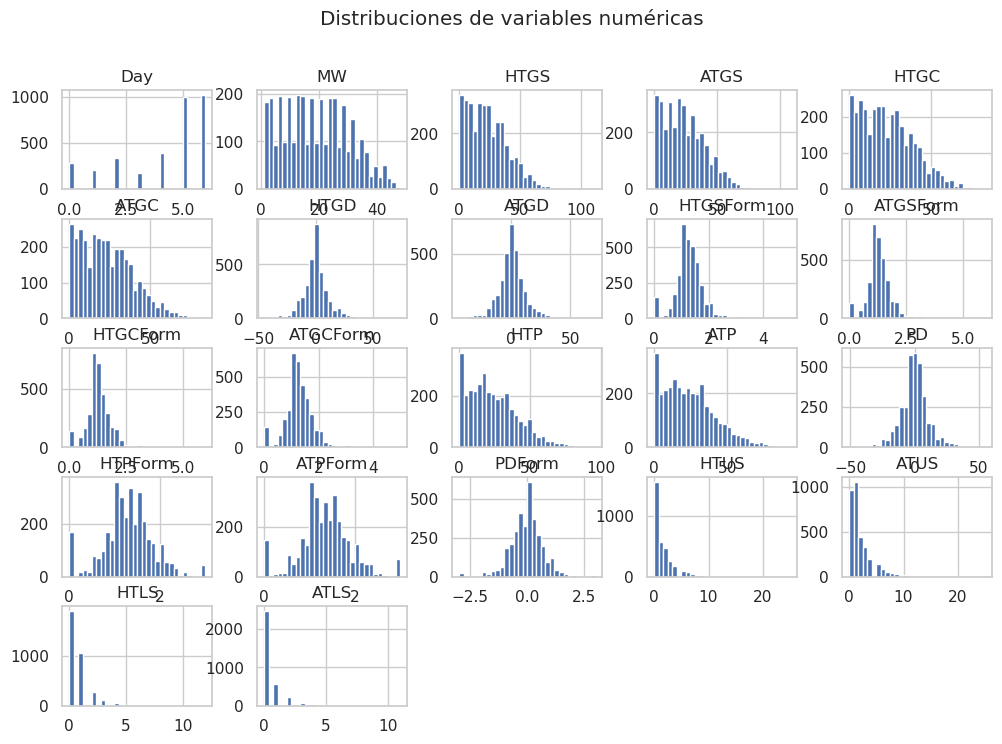

In [94]:
df[num_cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribuciones de variables numéricas")
plt.show()

Las variables Form y HTUS, ATUS, HTLS, ATLS tienen rangos estrechos de valores y, además, muchos ceros, afectando a la variabilidad.

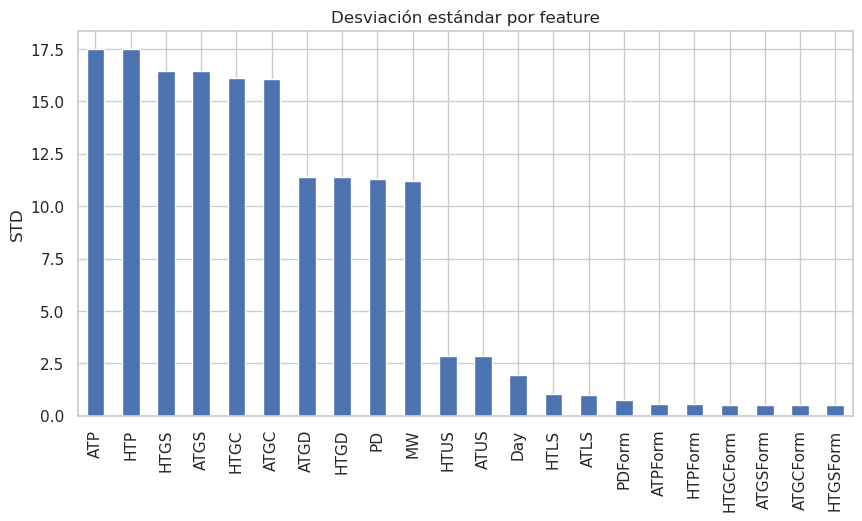

In [95]:
df[num_cols].std().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Desviación estándar por feature")
plt.ylabel("STD")
plt.show()

La baja desviación de las variables Form y HTLS, ATLS, Day reflejan la poca utilidad que pueden tener.

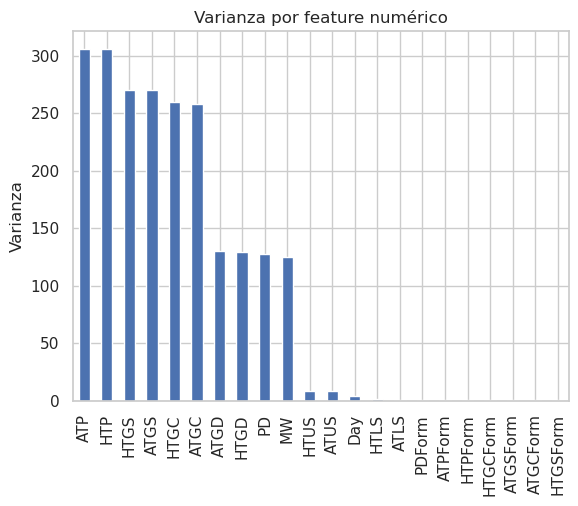

In [96]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
selector.fit(df[num_cols])

variances = selector.variances_
pd.Series(variances, index=num_cols).sort_values(ascending=False).plot(kind='bar')
plt.title("Varianza por feature numérico")
plt.ylabel("Varianza")
plt.show()

Dado que una mayor varianza significa que el feature puede reprepresentar diferencias entre muestras. Las variables ATP, HTP, HTGS, ATGS, etc., serían las más convenientes.

### Conclusión de la revisión

La mayoría de variables Form y otras como HTLS y ATLS, por su baja variabilidad y distribución, no soy muy útiles para la predicción.

In [97]:
num_cols = ['ATP', 'HTP', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'ATGD', 'HTGD', 'PD', 'MW']

In [98]:
df[num_cols].describe()

,ATP,HTP,HTGS,ATGS,HTGC,ATGC,ATGD,HTGD,PD,MW
count,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000,3422.000000
mean,24.655757,24.308591,23.510228,23.741379,23.464933,23.222677,0.518703,0.045295,-0.347165,18.921099
std,17.496769,17.491169,16.441895,16.437476,16.117818,16.060470,11.407013,11.389005,11.286127,11.179552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-44.000000,-45.000000,-51.000000,1.000000
25%,11.000000,10.000000,10.000000,10.250000,10.000000,10.000000,-5.000000,-5.000000,-6.000000,10.000000
50%,22.000000,22.000000,22.000000,22.000000,22.000000,21.000000,0.000000,0.000000,0.000000,18.000000
75%,36.000000,35.000000,34.000000,34.000000,34.000000,34.000000,6.000000,5.000000,5.000000,27.000000
max,93.000000,96.000000,112.000000,108.000000,83.000000,84.000000,71.000000,74.000000,55.000000,48.000000


In [99]:
X = df.copy()
y = X.pop('Result')

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state=69)

In [101]:
X_train.shape

(2737, 39)

## Selección de Features

In [102]:
mi_num = mutual_info_classif(X_train[num_cols], y_train, discrete_features='auto',
                               random_state=69)
mi_num = pd.Series(mi_num, name="MI Scores", index=X_train[num_cols].columns)
mi_num = mi_num.sort_values(ascending=False)

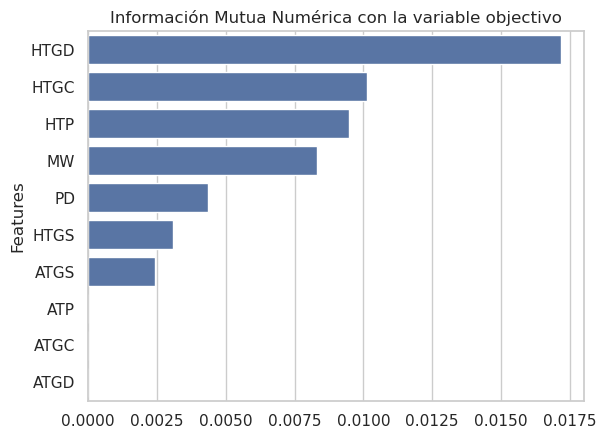

In [103]:
sns.barplot(x=mi_num.values, y=mi_num.index)
plt.ylabel('Features')
plt.title('Información Mutua Numérica con la variable objectivo')
plt.show()

In [104]:
X_cat = X_train[cat_cols]
encoder = OrdinalEncoder()
X_cat_enc = encoder.fit_transform(X_cat)

In [105]:
mi_cat = mutual_info_classif(X_cat_enc, y_train, discrete_features=True,
                               random_state=69)
mi_cat = pd.Series(mi_cat, name="MI Scores", index=X_train[cat_cols].columns)
mi_cat = mi_cat.sort_values(ascending=False)

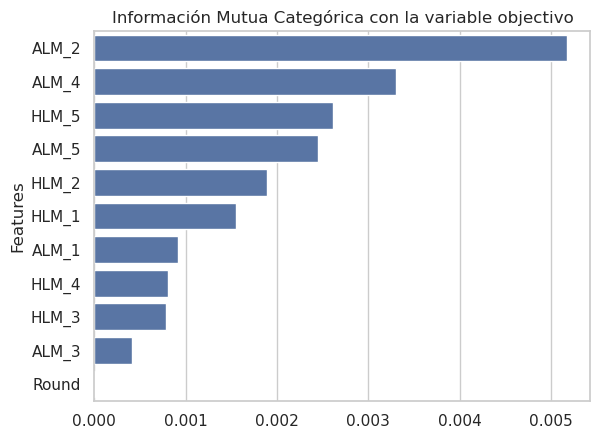

In [106]:
sns.barplot(x=mi_cat.values, y=mi_cat.index)
plt.ylabel('Features')
plt.title('Información Mutua Categórica con la variable objectivo')
plt.show()

In [107]:
num_cols = mi_num.index[:-3]
num_cols

Index(['HTGD', 'HTGC', 'HTP', 'MW', 'PD', 'HTGS', 'ATGS'], dtype='object')

In [108]:
cat_cols = mi_cat.index[:4]
cat_cols

Index(['ALM_2', 'ALM_4', 'HLM_5', 'ALM_5'], dtype='object')

In [109]:
preproc = ColumnTransformer([
    ('scale', RobustScaler(), num_cols),
    ('cat', OrdinalEncoder(), cat_cols)
], remainder='drop')

In [110]:
pipe = Pipeline([
    ('preproc', preproc),
    ('clf', LogisticRegression())
])

In [111]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(transformers=[('scale',
                                                                         RobustScaler(),
                                                                         Index(['HTGD', 'HTGC', 'HTP', 'MW', 'PD', 'HTGS', 'ATGS'], dtype='object')),
                                                                        ('cat',
                                                                         OrdinalEncoder(),
                                                                         Index(['ALM_2', 'ALM_4', 'HLM_5', 'ALM_5'], dtype='object'))])),
                                       ('clf', LogisticRegression())]),
             param_grid=[{'clf': [LogisticRegression(max_iter=1000)],...
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...)],
                          'clf__colsample_bytree': [0.8, 1],
                          'clf__learning_rate': [0.01, 0.1],
                          'clf__max_depth': [3, 6, 9],
                          'clf__n_estimators': [100, 200],
                          'clf__objective': ['binary:logistic'],
                          'clf__random_state': [69],
                          'clf__subsample': [0.8, 1]}])

In [112]:
y_pred = grid.best_estimator_.predict(X_test)

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60       333
           1       0.61      0.56      0.58       352

    accuracy                           0.59       685
   macro avg       0.59      0.59      0.59       685
weighted avg       0.59      0.59      0.59       685

